# Python training UGA 2017

**A training to acquire strong basis in Python to use it efficiently**

Pierre Augier (LEGI), Cyrille Bonamy (LEGI), Eric Maldonado (Irstea), Franck Thollard (ISTERRE), Oliver Henriot (GRICAD), Christophe Picard (LJK)

# Python scientific ecosystem
# A short introduction to Numpy and Matplotlib

## Python scientific ecosystem

There are a lot of very good Python packages for sciences. The fundamental packages are in particular:
- [numpy](http://www.numpy.org/): numerical computing with powerful numerical arrays objects, and routines to manipulate them.
- [scipy](http://www.scipy.org/): high-level numerical routines. Optimization, regression, interpolation, etc.
- [matplotlib](http://matplotlib.org/): 2D-3D visualization, “publication-ready” plots.

With `Ipython` and `Spyder`, Python plus these fundamental scientifics packages constitute a very good alternative to Matlab. Matlab and this Python ecosystem are technically very similar (using the libraries Blas and Lapack). Python syntax is nicer and this language is much more generalist. Matlab has a JIT compiler so other Python tools (for example `pypy`, `cython`, `numba`, `pythran`, `theano`...) have to be used to optimize the code to reach the performance of optimized Matlab code.

There are several other scientific Python packages, in particular:
- [sympy](http://www.sympy.org) for symbolic computing,
- [pandas](http://pandas.pydata.org/), [statsmodels](http://www.statsmodels.org), [seaborn](http://seaborn.pydata.org/) for statistics,
- [h5py](http://www.h5py.org/), [h5netcdf](https://pypi.python.org/pypi/h5netcdf) for hdf5 and netcdf files,
- [mpi4py](https://pypi.python.org/pypi/mpi4py) for MPI communications,
- [opencv](https://pypi.python.org/pypi/opencv-python), [scikit-image](http://scikit-image.org/) for image processing,
- [pyopencl](https://pypi.python.org/pypi/pyopencl), [pycuda](https://mathema.tician.de/software/pycuda/), [theano](http://deeplearning.net/software/theano/), [tensorflow](https://www.tensorflow.org/) for speed and GPU computing,
- [scikit-learn](http://scikit-learn.org), [keras](https://keras.io/), [mxnet](http://mxnet.io/) for machine learning,
- [bokeh](http://bokeh.pydata.org) for display data efficiently,
- [mayavi](http://docs.enthought.com/mayavi/mayavi/) for 3D visualization,
- [qtpy](https://pypi.python.org/pypi/QtPy), [kivy](https://kivy.org) for GUI frameworks
- ...

## A short introduction on Numpy

Code using numpy usually starts with the import statement

In [1]:
import numpy as np

Numpy provides the type `np.ndarray`. Such array are multidimensionnal sequences of homogeneous elements. They can be created for example with the commands:

In [2]:
# from a list
l = [10.0, 12.5, 15.0, 17.5, 20.0]
np.array(l)

array([ 10. ,  12.5,  15. ,  17.5,  20. ])

In [3]:
# fast but the values can be anything
np.empty(4)

array([  6.93230131e-310,   2.10649987e-316,   6.93229745e-310,
         6.93228086e-310])

In [4]:
# slower than np.empty but the values are all 0.
np.zeros([2, 6])

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [5]:
# multidimensional array
a = np.ones([2, 3, 4])
print(a.shape, a.size, a.dtype)
a

(2, 3, 4) 24 float64


array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]]])

In [6]:
# like range but produce 1d array
np.arange(4)

array([0, 1, 2, 3])

In [7]:
# np.arange can produce arrays of float
np.arange(4.)

array([ 0.,  1.,  2.,  3.])

In [8]:
# another convenient function 1d array
np.linspace(10, 20, 5)

array([ 10. ,  12.5,  15. ,  17.5,  20. ])

An numpy array can be easily converted to a Python list.

In [9]:
a = np.linspace(10, 20 ,5)
list(a)

[10.0, 12.5, 15.0, 17.5, 20.0]

# Why do we have numpy?
Beside some convenient functions for the manipulation of data in arrays of arbritrary dimensions, numpy can be much more efficient than pure Python.

In [10]:
n = 1000
# we use the ipython magic command %timeit
%timeit list(range(n))

10000 loops, best of 3: 27.3 µs per loop


In [11]:
%%capture timeit_python
# to capture the result of the command timeit in the variable timeit_python
# Pure Python
%timeit list(range(n))

In [12]:
%%capture timeit_numpy
# numpy
%timeit np.arange(n)

In [13]:
def compute_time_in_second(timeit_result):
    string = timeit_result.stdout
    for line in string.split('\n'):
        words = line.split(' ')
        if len(words) > 1 and words[1] == 'loops,':
            time = float(words[5])
            unit = words[6]
    if unit == 'ms':
        time *= 1e-3
    elif unit == 'us':
        time *= 1e-6
    elif unit == 'ns':
        time *= 1e-9
    return time

def compare_times(string, timeit_python, timeit_numpy):
    time_python = compute_time_in_second(timeit_python)
    time_numpy = compute_time_in_second(timeit_numpy)

    print(string + ': ratio times (Python / NumPy): ', 
          time_python/time_numpy)

In [14]:
compare_times('Creation of object', timeit_python, timeit_numpy)

Creation of object: ratio times (Python / NumPy):  9.189189189189188


In [15]:
n = 200000
python_r_1 = range(n)
python_r_2 = range(n)

numpy_a_1 = np.arange(n)
numpy_a_2 = np.arange(n)

In [16]:
%%capture timeit_python
%%timeit
# Regular Python
[(x + y) for x, y in zip(python_r_1, python_r_2)]

In [17]:
print(timeit_python)

10 loops, best of 3: 26.3 ms per loop



In [18]:
%%capture timeit_numpy
%%timeit
#Numpy
numpy_a_1 + numpy_a_2

In [19]:
print(timeit_numpy)

1000 loops, best of 3: 305 us per loop



In [20]:
compare_times('Additions', timeit_python, timeit_numpy)

Additions: ratio times (Python / NumPy):  86.22950819672131


This shows that when you need to perform mathematical operations on a lot of homogeneous numbers, it is more efficient to use `numpy` arrays.

## How a np.ndarray can be used?

`numpy` arrays offer also the same functionality available in language such as Fortan or Matlab. 
For example, we can define the slice of the array `A` that comprises its two first rows and the columns with an even index:

In [21]:
a = np.ones([4, 2])
a[:2, ::2]

array([[ 1.],
       [ 1.]])

Mask:

In [22]:
cond = a > 0.5
print(cond)
print(a[cond])

[[ True  True]
 [ True  True]
 [ True  True]
 [ True  True]]
[ 1.  1.  1.  1.  1.  1.  1.  1.]


Element wise operations:

In [23]:
2*a**2 

array([[ 2.,  2.],
       [ 2.,  2.],
       [ 2.,  2.],
       [ 2.,  2.]])

Apply functions element wise:

In [24]:
np.exp(a)

array([[ 2.71828183,  2.71828183],
       [ 2.71828183,  2.71828183],
       [ 2.71828183,  2.71828183],
       [ 2.71828183,  2.71828183]])

### Methods of np.ndarray

In [25]:
[s for s in dir(a) if not s.startswith('__')]

['T',
 'all',
 'any',
 'argmax',
 'argmin',
 'argpartition',
 'argsort',
 'astype',
 'base',
 'byteswap',
 'choose',
 'clip',
 'compress',
 'conj',
 'conjugate',
 'copy',
 'ctypes',
 'cumprod',
 'cumsum',
 'data',
 'diagonal',
 'dot',
 'dtype',
 'dump',
 'dumps',
 'fill',
 'flags',
 'flat',
 'flatten',
 'getfield',
 'imag',
 'item',
 'itemset',
 'itemsize',
 'max',
 'mean',
 'min',
 'nbytes',
 'ndim',
 'newbyteorder',
 'nonzero',
 'partition',
 'prod',
 'ptp',
 'put',
 'ravel',
 'real',
 'repeat',
 'reshape',
 'resize',
 'round',
 'searchsorted',
 'setfield',
 'setflags',
 'shape',
 'size',
 'sort',
 'squeeze',
 'std',
 'strides',
 'sum',
 'swapaxes',
 'take',
 'tobytes',
 'tofile',
 'tolist',
 'tostring',
 'trace',
 'transpose',
 'var',
 'view']

### Specialized numpy sub-packages:

To perform linear algebra with dense matrices, we can use the submodule `numpy.linalg`. For instance, in order to compute the determinant of a random matrix, we use the method `det`

In [26]:
A = np.random.random([5,5])
print(A)
np.linalg.det(A)

[[ 0.14431881  0.10316824  0.45311528  0.96504943  0.5238022 ]
 [ 0.43326924  0.45647672  0.7949363   0.9636818   0.16790703]
 [ 0.44160405  0.20359737  0.75413788  0.83906913  0.8698779 ]
 [ 0.09550708  0.50482085  0.42907336  0.07910774  0.84243964]
 [ 0.71426196  0.65624648  0.6452746   0.21826497  0.46637299]]


0.052177378954056136

Numpy array can also be sorted, even when they are composed of complex data.

In [27]:
dtypes = np.dtype([('country', 'S20'), ('density', 'i4'), 
                   ('area', 'i4'), ('population', 'i4')])
x = np.array([('Netherlands', 393, 41526, 16928800),
              ('Belgium', 337, 30510, 11007020),
              ('United Kingdom', 256, 243610, 62262000),
              ('Germany', 233, 357021, 81799600)], 
             dtype=dtypes)
arr = np.array(x, dtype=dtypes)
arr.sort(order='density')
print(arr)

[(b'Germany', 233, 357021, 81799600)
 (b'United Kingdom', 256, 243610, 62262000)
 (b'Belgium', 337, 30510, 11007020) (b'Netherlands', 393, 41526, 16928800)]


In the previous example, we manipulated a one dimensional array containing quadruplets of data. This functionality can be used to load images into arrays and save arrays to images.

If the data are sparse matrices, instead of using `numpy`, it is recommended to use `scipy`.

In [28]:
from scipy.sparse import csr_matrix
print(csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]]))

  (0, 0)	1
  (0, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5


## A short introduction to Matplotlib ([gallery](http://matplotlib.org/gallery.html))

The default library to plot data is `Matplotlib`.
It allows one the creation of graphs that are ready for publications with the same functionality than Matlab.

In [1]:
# this ipython command loads a special backend for notebooks (do not use outside jupyter)
%matplotlib notebook

When running code using matplotlib, it is highly recommended to start ipython with the option --matplotlib.

In [30]:
import matplotlib.pyplot as plt

You can plot any kind of numerical data.

<IPython.core.display.Javascript object>


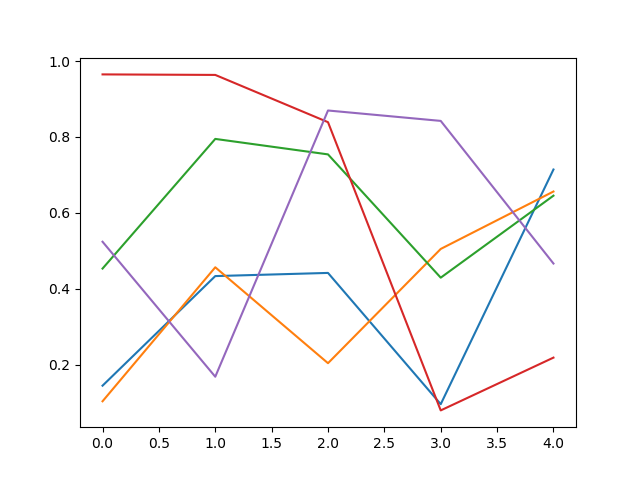

In [31]:
lines = plt.plot(A)

In scripts, the `plt.show` method needs to be invoked at the end of the script.

We can plot data by giving specific coordinates.

In [32]:
x = np.linspace(0, 2, 20)
y = x**2

<IPython.core.display.Javascript object>


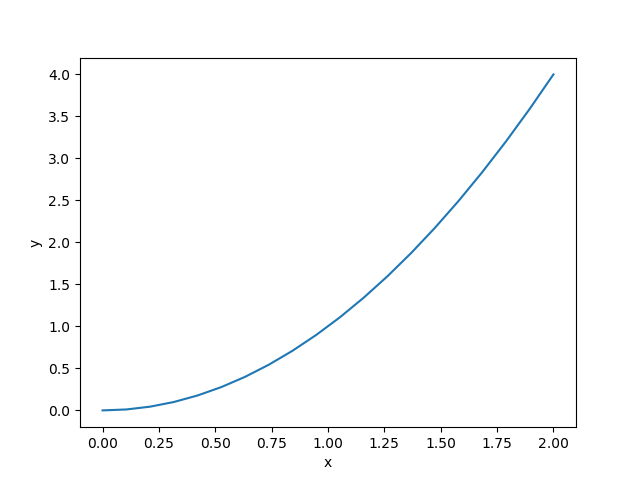

In [33]:
plt.figure()
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')

We can associate the plot with an object figure. This object will allow us to add labels, subplot, modify the axis or save it as an image.

<IPython.core.display.Javascript object>


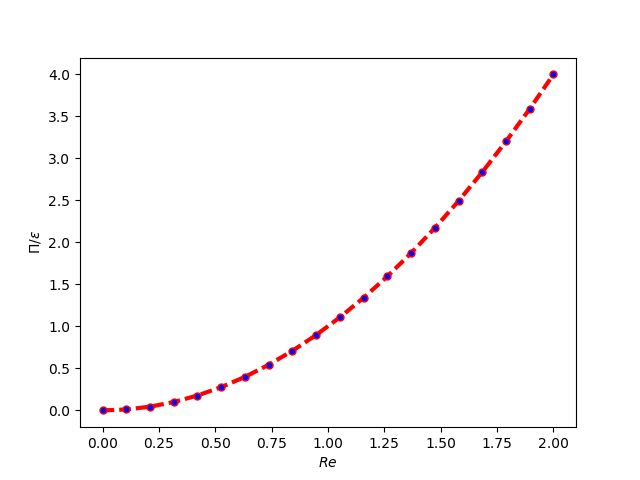

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color="red", linestyle='dashed', linewidth=3, marker='o',
        markerfacecolor='blue', markersize=5)

ax.set_xlabel('$Re$')
ax.set_ylabel('$\Pi / \epsilon$')

We can also plot array of data.

<IPython.core.display.Javascript object>


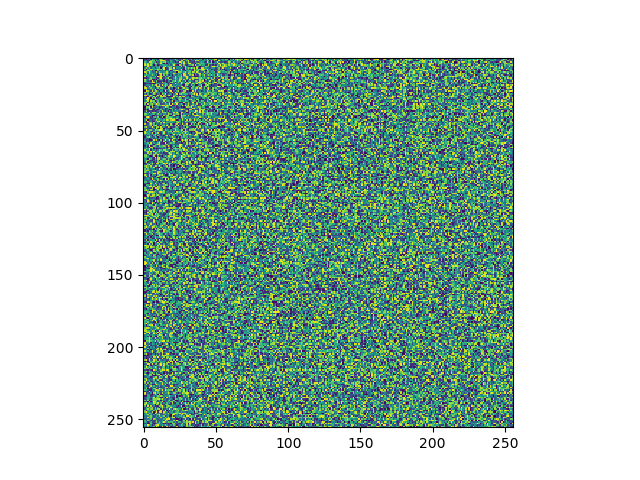

In [35]:
noise = np.random.random((256,256))
plt.figure()
plt.imshow(noise)

We can also add a colobar and adjust the colormap.

<IPython.core.display.Javascript object>


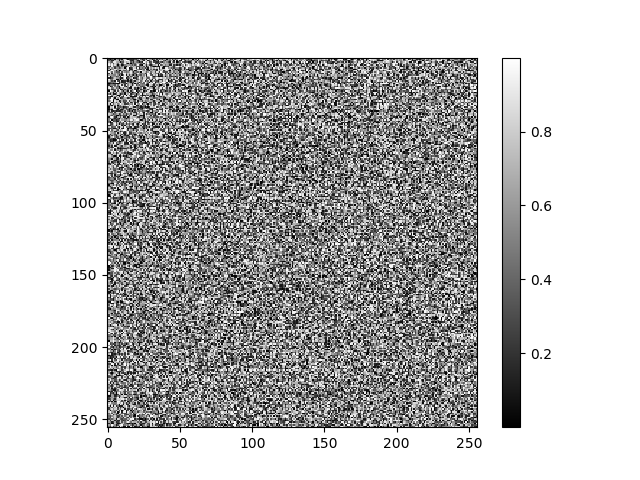

In [36]:
plt.figure()
plt.imshow(noise, cmap=plt.cm.gray)
plt.colorbar()

## Do it yourself: plot basic figures

Write a script using numpy and matplotlib to plot simple figures.